# Notebook  to estimate parameters from ICB and SLC 

In [20]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

## Estimate soil moisture content
Determined by site characteristics

porosity = 0.4  : uncertainty bounds?

## Estimate growth rates

 $$   G_f = \frac{k G_{o}}{G_{o} +(k-G_{o}) e^{-r t}} $$

Assume $G_f$ and $G_o$ are known.  Rearrange:
$$ r = \frac{1}{t} \log\bigg(\frac{G_f (k- G_u)}{G_o (k - G_f)}\bigg)$$ 

$$ \frac{G}{G_o} = 0.7 = \frac{G_o}{G_o + (k- G_o)}$$ 

### White fir, sexual maturity approach
 -  list other species (Gaby)
 - source for numbers.

Trees of interest are:

- Pinus jeffreyi : PIJE (Jeffrey pine)
- Abies magnifica : ABMA, (California red fir)
- A. concolor: ABCO (white fir)
        -  in Maxwell
- P. contorta; PICO (lodgepole pine)


Shrubs are:
- Ceanothus cordulatus; CECO (whitethorn ceanothus)
    
see: (Boisrame,2017)

White fir  / Maxwell (2018)

- ABGRC, Grand or white fir (Abies grandis/concolor)
    - Sexual maturity at 35 years
    - max above ground biomass is 60000 g/m2 = 60 kg/m2
    
    
Assume sexual maturity is at 70% of max biomass
- add e.g. 60%-80% "uncertainty bound"


Maxwell (2018) also includes:
- PILA	Pinus lambertiana (Sugar pine) (40 km/m2; 20 years)
- PIMO3	Pinus monticola (10 kg/m2; 18 years)
- PIPO	Ponderosa pine (40 kg/m2; 25 years) 
- PSME  Doublas fir (Pseudotsuga menziesii (Mirb.) Franco) (100 kg/m2; 15 years)


Jeffrey pine

    Trees as young as 8 years old have produced cones” (Gucker 2007).

Re ceanothus, see:
https://www.fs.fed.us/database/feis/plants/shrub/ceacor/all.html#18

https://www.fs.fed.us/database/feis/plants/shrub/ceagre/all.html#:~:text=Seed%20production%3A%20Desert%20ceanothus%20plants,12%2C54%2C145%5D.&text=Zammit%20and%20Zedler%20%5B145%5D%20found,within%20two%20decades%20after%20fire.

In [21]:
k_u = 60 # kg.m2
Go = k_u*(0.01)
Gf = k_u*(0.7)
t = np.array([10, 35])
r_u = 1/t*np.log(Gf/Go*(k_u-Go)/(k_u-Gf))

In [22]:
r_u

array([0.54424177, 0.15549765])

In [23]:
## Max ANPP per month: 2
t = 60/(0.5*2)

In [24]:
k = 60 # kg.m2
Go = k*(0.01)
Gf = k*(0.99)
r = 1/t*np.log(Gf/Go*(k-Go)/(k-Gf))

In [25]:
r
# Conifer growth rate somewhere between 0.1 and 0.2

0.15317066167115295

### Shrubs

In [26]:
k_l = 7. # k_lg.m2  # TODO: dig this up in email to Sally and add to methods
Go = k_l*(0.01)
Gf = k_l*(0.7)

t = 4
r_l = 1/t*np.log(Gf/Go*(k_l-Go)/(k_l-Gf))
print (Go,Gf,Gf/Go, r_l)

0.07 4.8999999999999995 69.99999999999999 1.3606044276304483


In [27]:
r_l*0.1**0.5/k_u

0.007171014976369919

# Estimate alpha

$$ \frac{d G_l}{dt} = r_l S^\beta G_l \big(1-\frac{G_l}{k_l}\big) - \alpha G_u G_l$$

$$   r_l S^\beta \big(1-\frac{G_l}{k_l}\big) = \alpha G_u $$

$$  G_l = k_l\bigg(1- \frac{\alpha G_u}{ r_l S^\beta} \bigg)$$

assume $G_l \sim 0$ when $G_u = k_u$.

$$ \alpha = r_l S^\beta /k_u$$

###  What is the "steady state" $G_l$ if $G_u = 0.9 k_u$ ?

Let $G_{u} = \xi k_u$  

Then $$\alpha G_u =  \frac{r_l S^\beta G_u}{k_u} = {r_l S^\beta \xi}$$
and

$$ \frac{\alpha G_u}{r_lS^\beta} =   \frac{ G_u}{k_u} = { \xi}$$

Solving for $G_l$

$$  G_l = k_l\bigg(1- \frac{\alpha G_u}{ r_l S^\beta} \bigg)$$


$$  G_l = k_l\big(1- \xi \big)$$
 and 
$$  \frac{G_l}{k_l} = 1- \xi $$

## Assume we don't know beta 
S^beta = 1 if beta =0 and S^beta = S if beta = 1

In [10]:
r_l/k_u*0.1**1

0.0022676740460507473

In [11]:
r_l/k_u*0.1**0

0.022676740460507473

Expect alpha is ~ 0.002 or 0.02.

## Estimate mean biomass

In [12]:
# TODO: I don't know about these numbers.  From Quintana's thesis
# Convert weighted mean carbon (Mg/ha) to biomass (kg/m2)
print ("conifer = ", 97.13/10/0.47)
print ("shrubs = ", 14.79/10/0.47)
print ("meadow = ", 0.96/10/0.47)
print ("grass = ",  0.36/10/0.47)

# Alternative green canopy understory
# k_l =  5.6/0.47/10 # kg/m2, powers, green canopy understory

conifer =  20.66595744680851
shrubs =  3.146808510638298
meadow =  0.2042553191489362
grass =  0.07659574468085106


In [13]:
import numpy as np
## Estimate r from 
b = 0.9
a = 0.01

def r_of_tau(tau, a,b):
    return - np.log(a*(1-b)/(1-a))/tau

tau_u = 60
r_u = r_of_tau(tau_u, a,b)
print ("conifer : tau={0}, r={1:.3f}".format(tau_u, r_u))


tau_s = 6
r_l = r_of_tau(tau_s, a,b)
print ("shrubs : tau={0}, r={1:.3f}".format(tau_s, r_l))


conifer : tau=60, r=0.115
shrubs : tau=6, r=1.150


## Estimate mean biomass

In [28]:
import pandas as pd

shrub_conifer = {"k_u" : 60,
                 "k_l" : 10,
                 "r_u" : 0.15,
                 "r_l" : 1.5,
             }

class params:
    """    
    """
    def __init__(self, params = {}):
        """
        """
        for k, v in params.items():
             setattr(self, k, v)
                
p = params(shrub_conifer)


## Stability of the lower canopy
Maximum $\alpha$ where lower canopy biomass is stable (without fires)


In [29]:

S = 0.5
beta = 0.5
k_u = 20
r_l = 0.45
max_alpha = r_l*S**beta/k_u

print (max_alpha)

0.015909902576697322


## Schematic comparison of ICB and SLC


Text(0, 0.5, '$G_u$')

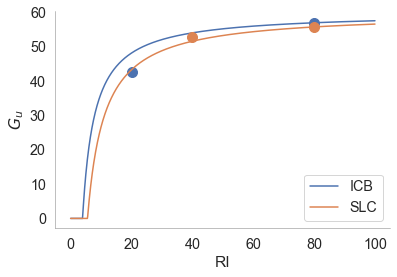

In [30]:
p = RCSR({"S" : 0.5})
RIs = np.arange(0, 100, .1)
G_us = mean_G_u(p.r_u, p.k_u, p.S, p.beta, RIs, p.severity)
line = plt.plot(  RIs,G_us, label = "ICB")

RI_i = 80; 
RI_f = 20;
G_u_i = (mean_G_u(p.r_u, p.k_u, p.S, p.beta, RI_i, p.severity))
plt.plot(RI_i, G_u_i, "o",  c= line[0].get_color(), ms = 10)
plt.plot(RI_f, G_u_i*0.75, "o", c= line[0].get_color(), ms = 10)


##. Update SLC soil moisture
p.S = 0.25

RIs = np.arange(0, 100, .1)
G_us = mean_G_u(p.r_u, p.k_u, p.S, p.beta, RIs, p.severity)
line = plt.plot(  RIs,G_us, label = "SLC")

RI_i = 80; 
RI_f = 40;
G_u_i = (mean_G_u(p.r_u, p.k_u, p.S, p.beta, RI_i, p.severity))
plt.plot(RI_i, G_u_i, "o",  c= line[0].get_color(), ms = 10)
plt.plot(RI_f, G_u_i*0.95, "o", c= line[0].get_color(), ms = 10)


plt.legend(loc = "lower right")
plt.xlabel("RI")
plt.ylabel("$G_u$")

## Understanding poisson

In [17]:
lambDa = 0.05
dt = 1
count = 0
events = []
time_since = 0
waits = []
for i in range(100000):
    if np.random.rand() < lambDa:
        count +=1
        waits.append(time_since + 1)
        time_since = 0
        events.append(1)
        
    else:
        time_since += 1        
        events.append(0)

In [18]:
wait_times = np.diff(np.nonzero(np.random.poisson(lambDa, 100000)))[0] 

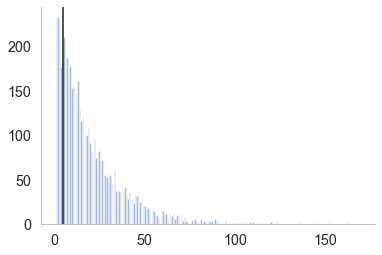

In [19]:
plt.hist(waits, 200, alpha=0.5);
# plt.hist(wait_times, 200);
plt.axvline(5, c= "k")